In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statistics
import seaborn as sb

In [2]:
petr3_df = pd.read_csv("arquivos/Acoes/PETR3.csv")    

In [3]:
pd.DataFrame(petr3_df)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var(%)
0,01.March.2024,37.36,41.38,41.86,35.50,13.95M,-9.36
1,01.February.2024,41.22,42.60,44.50,40.74,216.23M,-2.23
2,01.January.2024,42.16,39.00,42.93,38.59,204.82M,8.16
3,01.December.2023,38.98,37.60,39.33,35.06,178.38M,3.40
4,01.November.2023,37.70,36.68,38.51,35.22,239.96M,-0.37
...,...,...,...,...,...,...,...
79,01.August.2017,5.78,5.68,6.06,5.53,180.60M,1.23
80,01.July.2017,5.71,5.48,5.77,5.16,123.75M,4.55
81,01.June.2017,5.46,5.72,5.86,5.24,179.96M,-3.08
82,01.May.2017,5.64,5.96,6.77,5.34,251.19M,-5.15


In [4]:
print(f"Média = {petr3_df['Máxima'].mean()}")
print(f"Mediana = {petr3_df['Máxima'].median()}")
print(f"Máximo = {petr3_df['Máxima'].max()}")
print(f"Mínima = {petr3_df['Máxima'].min()}")
print(f"Variância = {petr3_df['Máxima'].var()}") 
print(f"Desvio Padrão = {petr3_df['Máxima'].std()}") 

Média = 17.379285714285714
Mediana = 13.48
Máximo = 44.5
Mínima = 5.77
Variância = 104.52983080895008
Desvio Padrão = 10.223983118577127


In [5]:
print(f"Média = {petr3_df['Mínima'].mean()}")
print(f"Mediana = {petr3_df['Mínima'].median()}")
print(f"Máximo = {petr3_df['Mínima'].max()}")
print(f"Mínima = {petr3_df['Mínima'].min()}")
print(f"Variância = {petr3_df['Mínima'].var()}") 
print(f"Desvio Padrão = {petr3_df['Mínima'].std()}") 

Média = 14.68797619047619
Mediana = 11.67
Máximo = 40.74
Mínima = 4.46
Variância = 80.64133681870341
Desvio Padrão = 8.980052161246247


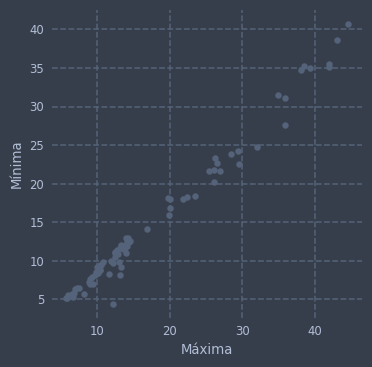

In [6]:
dispersao = petr3_df.plot.scatter(x='Máxima', y='Mínima')

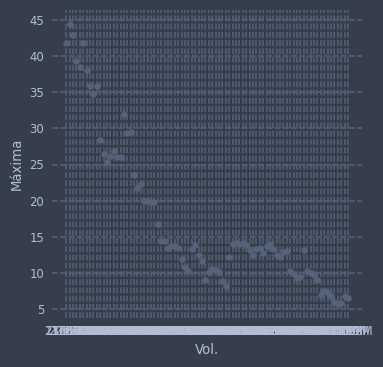

In [7]:
dispersao = petr3_df.plot.scatter(x='Vol.', y='Máxima')

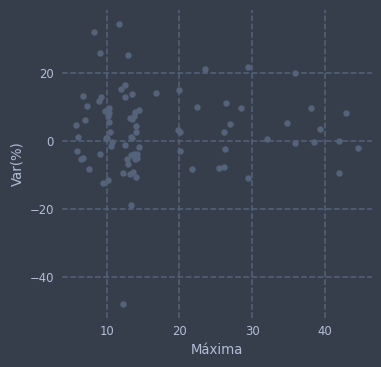

In [8]:
dispersao = petr3_df.plot.scatter(x='Máxima', y='Var(%)')

In [9]:
petr3_df.sort_values(by="Var(%)", ascending=True)[["Data", "Var(%)"]] 

,Data,Var(%)
48,01.March.2020,-47.92
37,01.February.2021,-18.95
69,01.June.2018,-12.48
42,01.September.2020,-11.42
18,01.September.2022,-11.00
...,...,...
19,01.August.2022,21.58
65,01.October.2018,25.13
74,01.January.2018,25.96
47,01.April.2020,31.90


In [10]:
petr3_df.sort_values(by="Var(%)", ascending=True)[["Data", "Máxima"]]

,Data,Máxima
48,01.March.2020,12.26
37,01.February.2021,13.28
69,01.June.2018,9.48
42,01.September.2020,10.17
18,01.September.2022,29.43
...,...,...
19,01.August.2022,29.47
65,01.October.2018,12.99
74,01.January.2018,9.08
47,01.April.2020,8.20


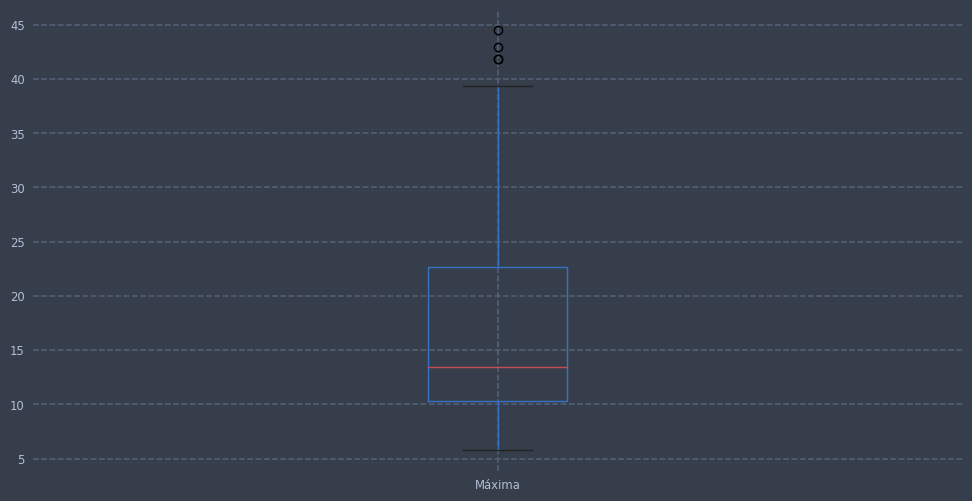

In [11]:
ax = petr3_df.boxplot(column = "Máxima", figsize = (12,6))

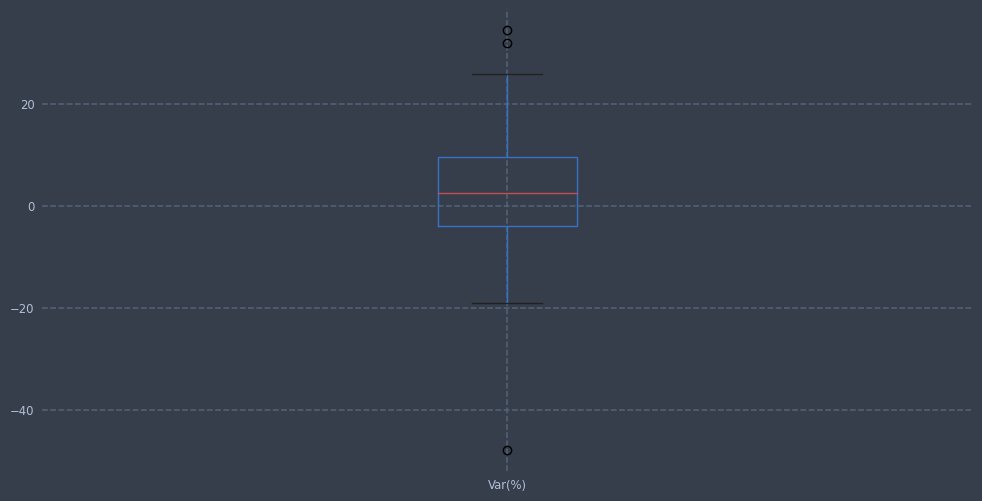

In [12]:
ax = petr3_df.boxplot(column = "Var(%)", figsize = (12,6))

In [68]:
dataIdh = pd.read_csv("arquivos/IDH/idh.csv")

print(f"var      {dataIdh['idh'].var():.6f}")
print(dataIdh["idh"].describe())



var      0.000023
count    5.000000
mean     0.760200
std      0.004817
min      0.754000
25%      0.758000
50%      0.759000
75%      0.764000
max      0.766000
Name: idh, dtype: float64


Text(0.5, 1.0, 'IDH brasileiro de 2017 a 2021')

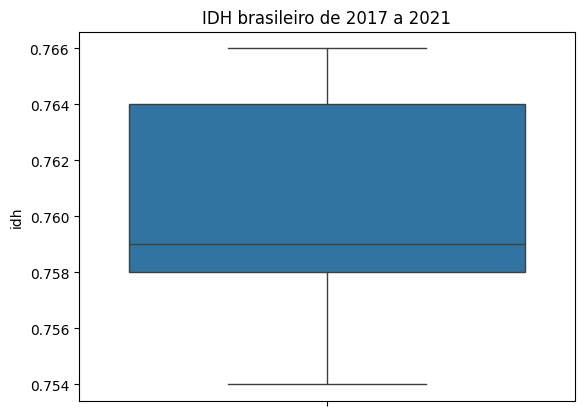

In [45]:
sb.boxplot(dataIdh, y='idh').set_title("IDH brasileiro de 2017 a 2021")

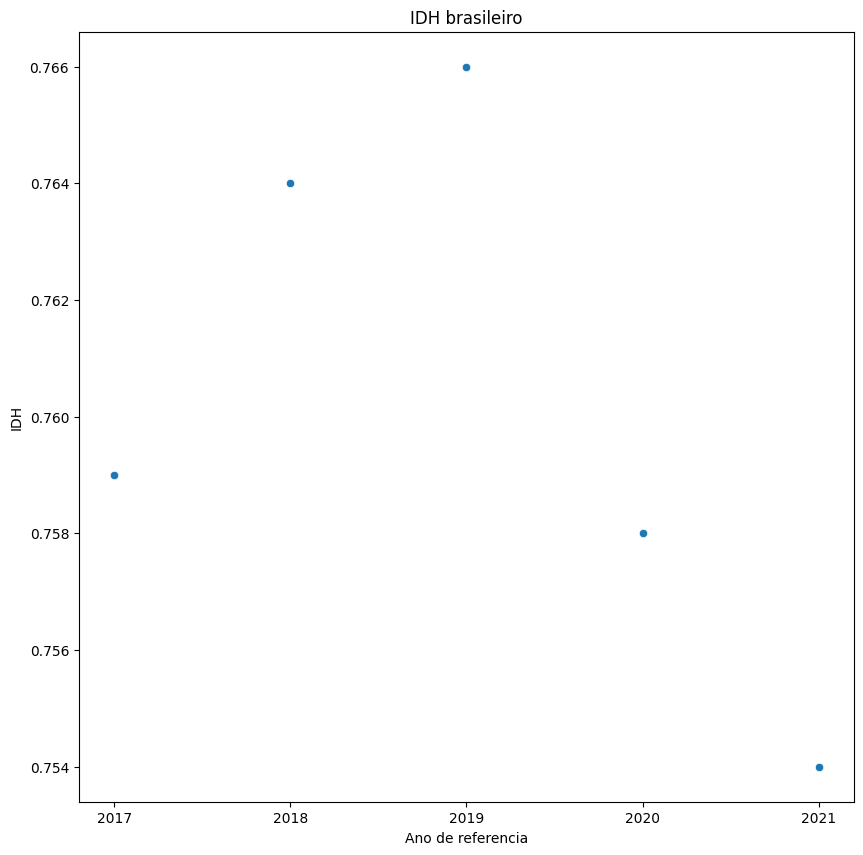

In [86]:
plt.figure(figsize=(10,10))

dispersaoIdh = sb.scatterplot(data=dataIdh, x='ano_referencia', y='idh')

dispersaoIdh.xaxis.set_major_locator(ticker.MultipleLocator(1))

dispersaoIdh.set_title("IDH brasileiro")
dispersaoIdh.set_ylabel("IDH")
dispersaoIdh.set_xlabel("Ano de referencia")

plt.show()

In [65]:
dataIdhReg = pd.read_csv("arquivos/IDH/GDL-Subnational-HDI-data.csv")

dataIdhReg = dataIdhReg.loc[dataIdhReg['Country'] == 'Brazil']

dataIdhReg = dataIdhReg[['Region', '2017', '2018', '2019', '2020', '2021']]

dataIdhReg = dataIdhReg.drop(209)

for cln in dataIdhReg:
    if cln == 'Region': continue
    print(f'Var       {dataIdhReg[cln].var():.6f}')
    print(dataIdhReg[cln].describe())
    print()

Var       0.000725
count    27.000000
mean      0.749000
std       0.026932
min       0.703000
25%       0.732500
50%       0.748000
75%       0.764000
max       0.821000
Name: 2017, dtype: float64

Var       0.000730
count    27.000000
mean      0.753963
std       0.027016
min       0.708000
25%       0.737500
50%       0.753000
75%       0.769000
max       0.826000
Name: 2018, dtype: float64

Var       0.000748
count    27.000000
mean      0.756074
std       0.027357
min       0.709000
25%       0.739500
50%       0.755000
75%       0.771000
max       0.829000
Name: 2019, dtype: float64

Var       0.000731
count    27.000000
mean      0.747889
std       0.027040
min       0.702000
25%       0.731500
50%       0.746000
75%       0.763000
max       0.820000
Name: 2020, dtype: float64

Var       0.000724
count    27.000000
mean      0.744074
std       0.026899
min       0.698000
25%       0.727500
50%       0.743000
75%       0.759000
max       0.816000
Name: 2021, dtype: float64



Text(0.5, 1.0, 'IDH dos estados ao longo dos anos')

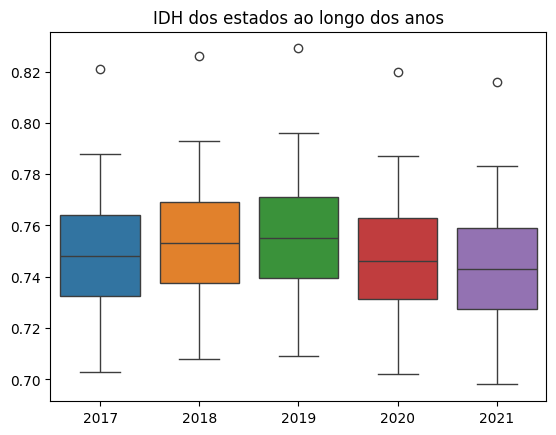

In [84]:
sb.boxplot(data=dataIdhReg).set_title('IDH dos estados ao longo dos anos')

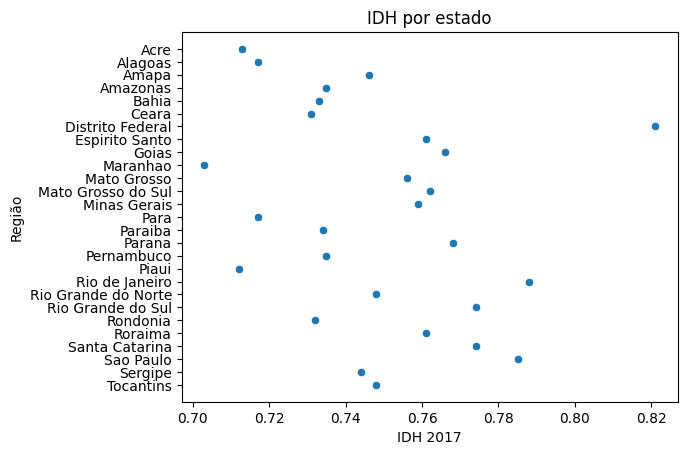

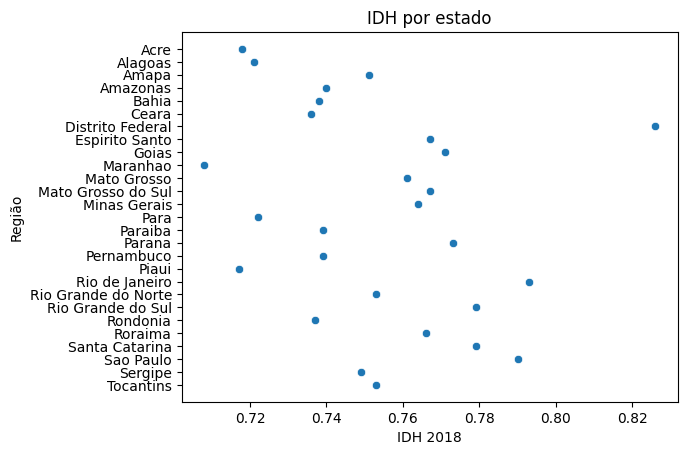

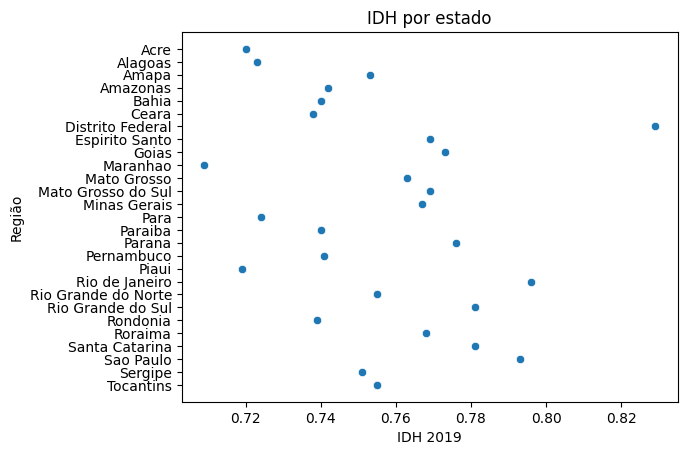

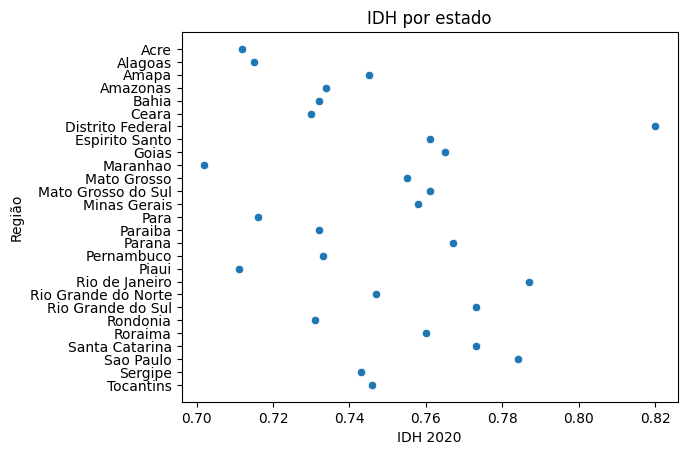

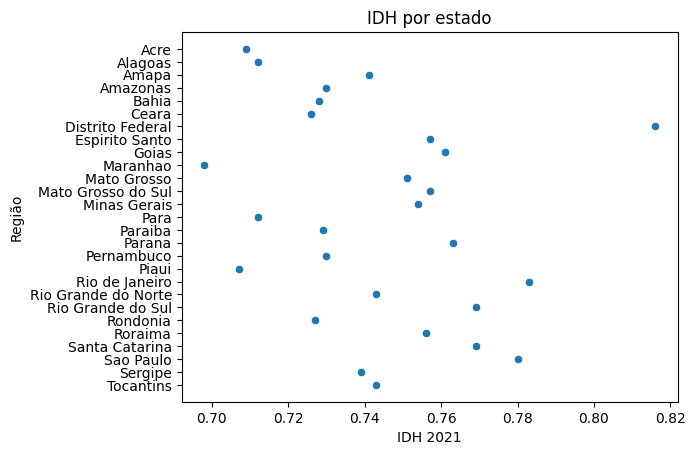

In [85]:

for cln in dataIdhReg:
    if cln == "Region": continue
    dispersaoIdh = sb.scatterplot(data=dataIdhReg, x=cln, y='Region')
    dispersaoIdh.set_title('IDH por estado')
    dispersaoIdh.set_xlabel(f'IDH {cln}')
    dispersaoIdh.set_ylabel('Região')
    plt.show()

